In [1]:
# import basic modules
import os, sys

# add parent folder of the C_to_U_classifier_plus_min package to path in order to be loaded into the current session
sys.path.append("/lustrehome/afonzino")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from C_to_U_classifier_plus_min import utils
import pysam
from tqdm import tqdm

In [2]:
cc1_residual_freq_thrs = pd.read_table("cc1/cc1.iforest.freq_thresholds.tsv")
cc1_residual_freq_thrs

,5mer,max
0,TCCGG,0.000000
1,GCCCC,0.000152
2,CACAG,0.000238
3,TTCCG,0.000290
4,GCCCA,0.000308
...,...,...
251,TGCTT,0.040472
252,TACTT,0.052759
253,AACTA,0.069187
254,TTCTG,0.074702


In [3]:
cc2_residual_freq_thrs = pd.read_table("cc2/cc2.iforest.freq_thresholds.tsv")
cc2_residual_freq_thrs

,5mer,max
0,GCCCA,0.000056
1,TCCCG,0.000130
2,GCCCC,0.000140
3,TCCGG,0.000152
4,GCCCT,0.000154
...,...,...
251,CTCAC,0.049107
252,TTCTG,0.057324
253,AACTA,0.066129
254,TACTT,0.066131


In [4]:
cc_merged_freq_thrs = pd.merge(cc1_residual_freq_thrs, cc2_residual_freq_thrs, on=["5mer"])
cc_merged_freq_thrs.columns = ["5mer", "max_cc1", "max_cc2"]
cc_merged_freq_thrs

,5mer,max_cc1,max_cc2
0,TCCGG,0.000000,0.000152
1,GCCCC,0.000152,0.000140
2,CACAG,0.000238,0.000331
3,TTCCG,0.000290,0.000468
4,GCCCA,0.000308,0.000056
...,...,...,...
251,TGCTT,0.040472,0.034367
252,TACTT,0.052759,0.066131
253,AACTA,0.069187,0.066129
254,TTCTG,0.074702,0.057324


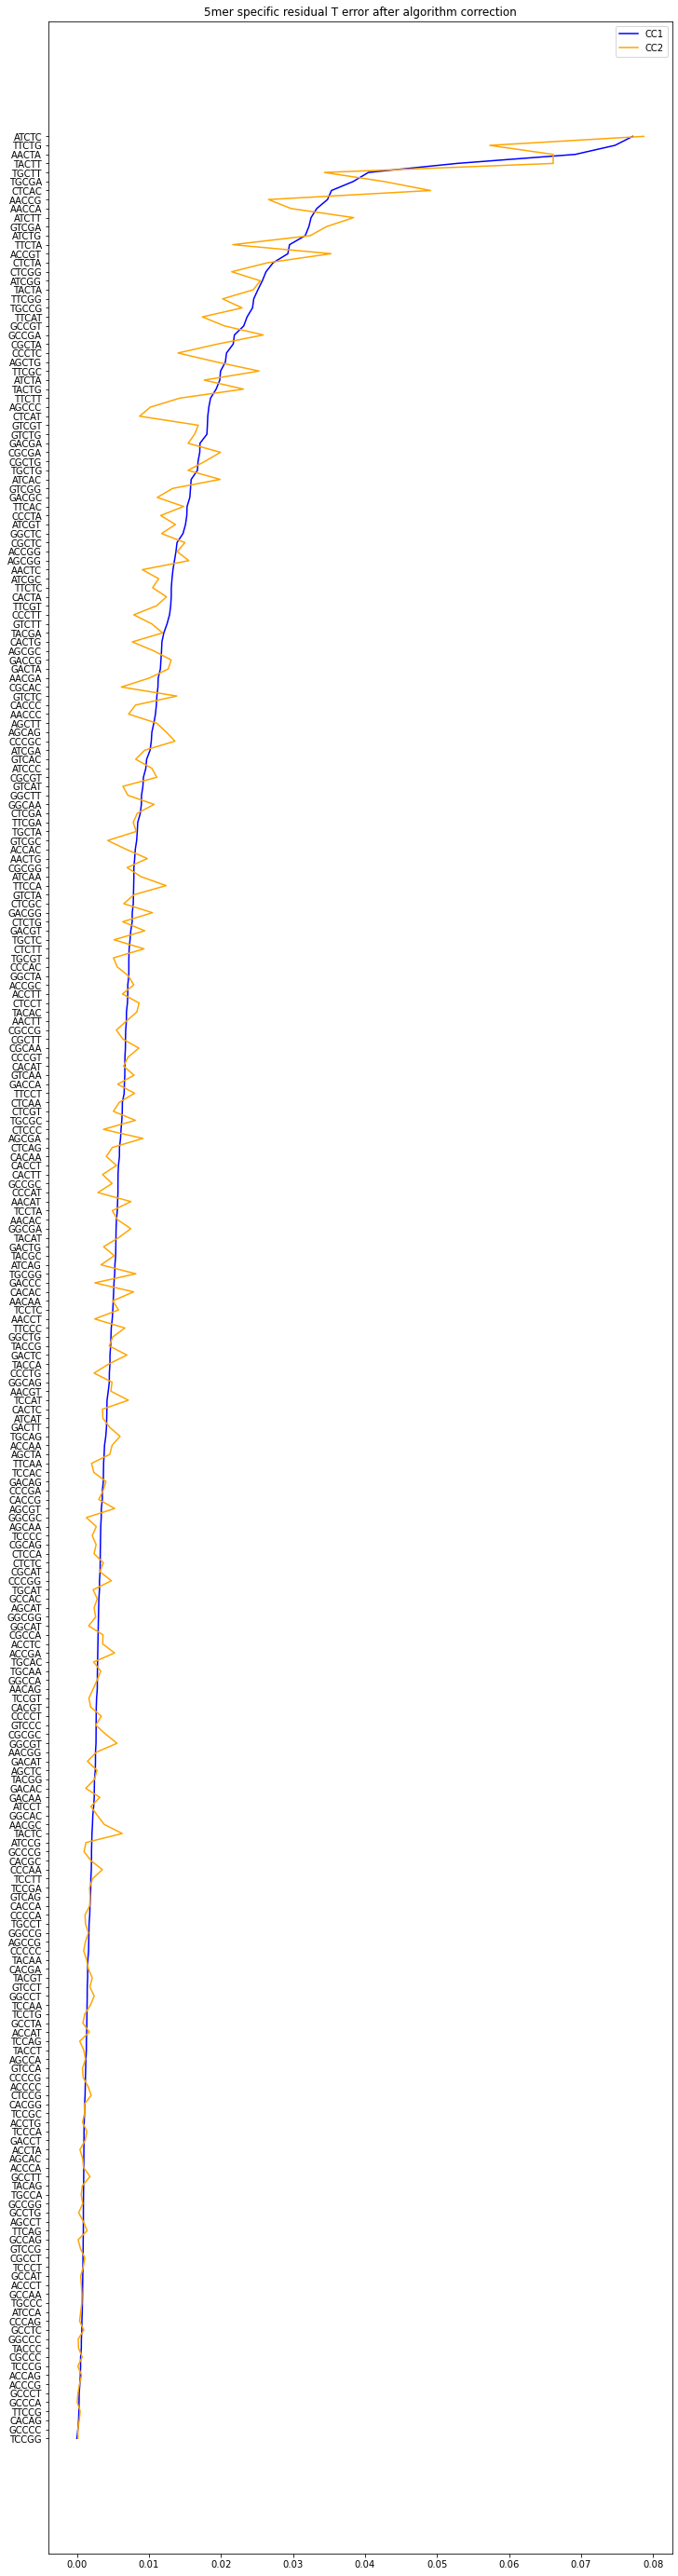

In [5]:
plt.figure(figsize=(12,50))
plt.plot(cc_merged_freq_thrs.max_cc1, cc_merged_freq_thrs["5mer"], color="blue", label="CC1")
plt.plot(cc_merged_freq_thrs.max_cc2,cc_merged_freq_thrs["5mer"], color="orange", label="CC2")
plt.title("5mer specific residual T error after algorithm correction")
plt.legend()
plt.savefig("Max CT freq error before and after iForest correction_cc1_plus_cc2.tiff", dpi=100)
plt.show()

In [6]:
# take maximum value among cc1 and cc2 and save final thresholds table
cc_merged_freq_thrs.set_index("5mer", inplace=True)
cc_merged_freq_thrs

,max_cc1,max_cc2
5mer,,
TCCGG,0.000000,0.000152
GCCCC,0.000152,0.000140
CACAG,0.000238,0.000331
TTCCG,0.000290,0.000468
GCCCA,0.000308,0.000056
...,...,...
TGCTT,0.040472,0.034367
TACTT,0.052759,0.066131
AACTA,0.069187,0.066129


In [7]:
cc_merged_freq_thrs_max = cc_merged_freq_thrs.T.describe().T["max"]
cc_merged_freq_thrs_max

5mer
TCCGG    0.000152
GCCCC    0.000152
CACAG    0.000331
TTCCG    0.000468
GCCCA    0.000308
           ...   
TGCTT    0.040472
TACTT    0.066131
AACTA    0.069187
TTCTG    0.074702
ATCTC    0.078705
Name: max, Length: 256, dtype: float64

In [8]:
cc_merged_freq_thrs_max.to_csv("cc1_cc2_merged.iforest.freq_thresholds.tsv", sep="\t")